#Analisis de Sentimientos


*   sentiment-analysis-spanish
*   keras tensorflow



In [ ]:
pip install sentiment-analysis-spanish

In [ ]:
pip install keras tensorflow

In [ ]:
from sentiment_analysis_spanish import sentiment_analysis

In [ ]:
def resultado(text):
    sentiment = sentiment_analysis.SentimentAnalysisSpanish()
    if sentiment.sentiment(text)>0.5:
        return 'Positive'
    else:
        return 'Negative'
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
def hacer_corpus_mod(tweets):
    corpus = []
    for i in range(0, len(tweets)):
        #eliminamos los links y hasgtags
        tweets['tweet'][i] = " ".join([word for word in tweets['tweet'][i].split()
                                        if 'http' not in word and '@' not in word and '#' not in word])
        #definimos caracteres que pueden leer
        #title = re.sub('[^a-zA-ZáéíóúñÁÉÍÓÚ]', ' ', tweets['tweet'][i])
        title = re.sub("@\S+", " ", tweets['tweet'][i])
        title = re.sub("#\S+", " ", title)
        title = title.replace('|', '')
        title = remove_emojis(title)
        #transformamos las mayusculas en minusculas
        #title = title.lower()
        #generamos los arreglos respectivos para los tweets con los carcteres aceptados
        title = title.split()
        #print(title)
        #eliminamos aquellas palabras que esten en el stopwords del español
        #title = [word for word in title if (not word in FinalStopWords and word != "rt")]
        #volvemos a crear el corpus con las palabras aceptadas
        title = ' '.join(title) + " "
        corpus.append(title)
    return corpus

In [ ]:

Resultado=sentiment.sentiment("me gusta la tombola es genial")
print(Resultado)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


0.9304396176531412


In [ ]:
sentiment = sentiment_analysis.SentimentAnalysisSpanish()
Resultado=sentiment.sentiment("me parece terrible esto que me estás diciendo")
print(Resultado)
print(resultado("me parece terrible esto que me estás diciendo"))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


2.1830853580533075e-06
Negative


In [ ]:
Data=hacer_corpus_mod(pd.read_csv('timpanoperu.csv'))
print(Data)

['"Jorge del Castillo, ladrón, rata, raaaaata!!!!!!" Tremendo recibimiento del pueblo digno de Arequipa. ', '¿A quién representa A nadie, excepto, a su padre, al ex congresista fujimorista, magnate de la educación, dueño de IDAT y de la Univ. UTP. De currículum lamentable, cero experiencia política, solo mucho dinero. ', 'No olvides q es hija del ex congresista Fujimorista Amuruz, maganate de la educación, dueño de IDAT y de la universidad UTP. La cumpleañera no representa a nadie, tan sólo a su bolsillo. ', 'La congresista Roselli Amuruz, solo representa los intereses de su padre, ex fujimorista y ahora magnate de la educación, dueño de IDAT y la Univ. UTP. O sea intereses personales. Por eso su CV es lamentable, cero experiencia. ', 'Cuanta razón tiene Héctor Béjar cuando habla de la derecha, por ejemplo respecto a los ataques: "viniendo de quienes viene y teniendo en cuenta el tipo de ataques que me han lanzado, supongo que eso contribuye a mi prestigio" ', 'En un país como el nuest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df = pd.DataFrame(Data, columns=['Tweets'])
df

,Tweets
0,"""Jorge del Castillo, ladrón, rata, raaaaata!!!..."
1,"¿A quién representa A nadie, excepto, a su pad..."
2,No olvides q es hija del ex congresista Fujimo...
3,"La congresista Roselli Amuruz, solo representa..."
4,Cuanta razón tiene Héctor Béjar cuando habla d...
5,"En un país como el nuestro, sería tremendament..."
6,"Alex Kouri, el mayor delincuente y corrupto po..."
7,"Totalmente irresponsable, en un país como el n..."
8,"Jóvenes, si van a seguir creyendo a este tipo ..."
9,Que se puede decir del periodismo que se suma ...


In [ ]:
df['Analysis'] = df['Tweets'].apply(resultado)
df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


,Tweets,Analysis
0,"""Jorge del Castillo, ladrón, rata, raaaaata!!!...",Positive
1,"¿A quién representa A nadie, excepto, a su pad...",Negative
2,No olvides q es hija del ex congresista Fujimo...,Negative
3,"La congresista Roselli Amuruz, solo representa...",Negative
4,Cuanta razón tiene Héctor Béjar cuando habla d...,Negative
5,"En un país como el nuestro, sería tremendament...",Negative
6,"Alex Kouri, el mayor delincuente y corrupto po...",Negative
7,"Totalmente irresponsable, en un país como el n...",Negative
8,"Jóvenes, si van a seguir creyendo a este tipo ...",Negative
9,Que se puede decir del periodismo que se suma ...,Negative


In [ ]:
j=1
for i in range(0, df.shape[0]):
  if(df['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + df['Tweets'][i])
    print()
    j += 1

1) "Jorge del Castillo, ladrón, rata, raaaaata!!!!!!" Tremendo recibimiento del pueblo digno de Arequipa. 



In [ ]:
j=1
for i in range(0, df.shape[0]):
  if(df['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + df['Tweets'][i])
    print()
    j += 1

1) ¿A quién representa A nadie, excepto, a su padre, al ex congresista fujimorista, magnate de la educación, dueño de IDAT y de la Univ. UTP. De currículum lamentable, cero experiencia política, solo mucho dinero. 

2) No olvides q es hija del ex congresista Fujimorista Amuruz, maganate de la educación, dueño de IDAT y de la universidad UTP. La cumpleañera no representa a nadie, tan sólo a su bolsillo. 

3) La congresista Roselli Amuruz, solo representa los intereses de su padre, ex fujimorista y ahora magnate de la educación, dueño de IDAT y la Univ. UTP. O sea intereses personales. Por eso su CV es lamentable, cero experiencia. 

4) Cuanta razón tiene Héctor Béjar cuando habla de la derecha, por ejemplo respecto a los ataques: "viniendo de quienes viene y teniendo en cuenta el tipo de ataques que me han lanzado, supongo que eso contribuye a mi prestigio" 

5) En un país como el nuestro, sería tremendamente irresponsable acelerar el retorno, sin haber alcanzado un mínimo de vacunación

In [ ]:
ptweet = df[df.Analysis == 'Positive']
pteet = ptweet['Tweets']

round(ptweet.shape[0] / df.shape[0] * 100, 1)

5.9

In [ ]:
ntweet = df[df.Analysis == 'Negative']
nteet = ntweet['Tweets']

round(ntweet.shape[0] / df.shape[0] * 100, 1)

94.1

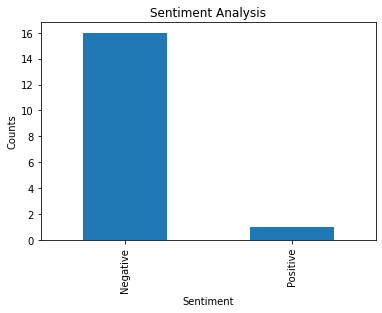

In [ ]:
import matplotlib.pyplot as plt
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()